In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head(10)

,t,x_1,x_2,y
0,0.0,-1.548319,-2.762987,0
1,0.0,-3.958870,-0.612780,0
2,0.0,-2.276375,0.614934,0
3,0.0,0.556287,-3.931406,0
4,0.0,-1.491000,-2.159297,0
5,0.0,0.588697,1.076664,0
6,0.0,-2.492578,-1.026339,0
7,0.0,-0.931397,-3.666661,0
8,0.0,-0.761716,-4.177700,0
9,0.0,-1.026876,-0.213718,0


In [4]:
x1 = df[["x_1"]].to_numpy()
x2 = df[["x_2"]].to_numpy()

In [5]:
x = np.hstack((np.ones((x1.shape[0],1)),x1,x2))

In [6]:
x.shape

(1250, 3)

In [7]:
x[0:5]

array([[ 1.        , -1.54831899, -2.76298744],
       [ 1.        , -3.95886967, -0.6127805 ],
       [ 1.        , -2.27637464,  0.61493359],
       [ 1.        ,  0.55628729, -3.9314064 ],
       [ 1.        , -1.49100031, -2.15929666]])

In [8]:
y = df[["y"]].to_numpy()

In [9]:
y.shape

(1250, 1)

In [10]:
y = y.astype(int)

In [11]:
t = df[["t"]].to_numpy()
t = t.astype(int)

In [12]:
t.shape

(1250, 1)

In [13]:
m = x.shape[0]

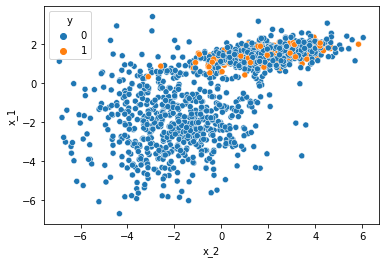

In [14]:
sns.scatterplot(x="x_2",y="x_1",hue="y",data=df)

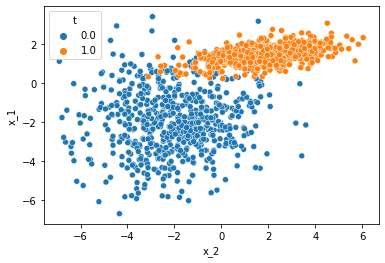

In [15]:
sns.scatterplot(x="x_2",y="x_1",hue="t",data=df)

In [16]:
def sigmoid(z):
    return 1 /(1 +  np.exp(-z))

In [17]:
def cost(x,y,theta):
    return -1/m * (y.T @ np.log(sigmoid(x @ theta)) + (1 - y).T @ np.log(1 - sigmoid(x@theta)))

In [18]:
def gradient(x,y,theta):
    gr = (x.T @ (y - sigmoid(x@theta))) / m
    return gr

In [19]:
def training(x,y,theta,learning_rate=0.1,epochs=20000):
    for i in range(epochs):
        theta = theta + learning_rate * gradient(x,y,theta)
        if i % 5000 == 0:
            print(f"cost = {cost(x,y,theta)}")
    return theta

In [20]:
theta = np.zeros((x.shape[1],1))
theta_y = training(x,y,theta,0.1,50000)
theta_y

cost = [[0.66676897]]
cost = [[0.27077266]]
cost = [[0.27077266]]
cost = [[0.27077266]]
cost = [[0.27077266]]
cost = [[0.27077266]]
cost = [[0.27077266]]
cost = [[0.27077266]]
cost = [[0.27077266]]
cost = [[0.27077266]]


array([[-2.91607454],
       [ 0.78596651],
       [ 0.09282768]])

In [21]:
theta = np.zeros((x.shape[1],1))
theta_t = training(x,t,theta,0.1,20000)
theta_t

cost = [[0.54121729]]
cost = [[0.0900999]]
cost = [[0.09009744]]
cost = [[0.09009744]]


array([[-0.97114142],
       [ 2.73208744],
       [ 1.07403475]])

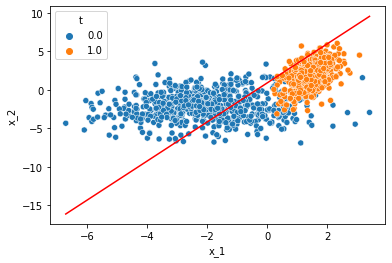

In [22]:
x1_vec = np.linspace(df["x_1"].min(),df["x_1"].max(),2)
# print(x1_vec)
sns.scatterplot(x="x_1", y="x_2", hue="t", data=df)
plt.plot(x1_vec,(x1_vec*theta_t[1]-theta_t[0])/theta_t[2], color="red")

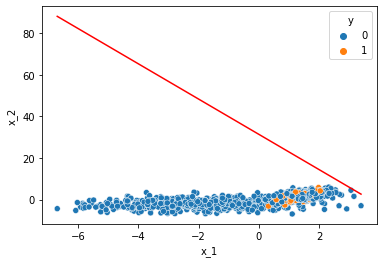

In [23]:
x1_vec = np.linspace(df["x_1"].min(),df["x_1"].max(),2)
# print(x1_vec)
sns.scatterplot(x="x_1", y="x_2", hue="y", data=df)
plt.plot(x1_vec,(-x1_vec*theta_y[1]-theta_y[0])/theta_y[2], color="red")

In [24]:
test_df =  pd.read_csv("test.csv")

In [25]:
test_df

,t,x_1,x_2,y
0,0.0,0.387421,-1.866760,0
1,0.0,-2.356436,-1.168553,0
2,0.0,-2.217217,-3.282972,0
3,0.0,-1.373251,-4.551377,0
4,0.0,-1.546461,-3.045420,0
...,...,...,...,...
121,1.0,1.112134,2.380248,0
122,1.0,1.048710,0.374687,0
123,1.0,1.374204,3.876723,0
124,1.0,2.081179,3.489406,1


In [26]:
x_test = np.hstack((np.ones((126,1)),test_df[["x_1"]].to_numpy(),test_df[["x_2"]].to_numpy()))

In [27]:
x_test.shape

(126, 3)

In [28]:
y_test = test_df[["y"]].to_numpy().astype(int)

In [29]:
t_test = test_df[["t"]].to_numpy().astype(int)

In [30]:
m = x_test.shape[0]
correct = 0
for i in range(m):
    pred = sigmoid(x_test[i] @ theta_y)
    if pred >= 0.5:
        pred = 1
    else:
        pred = 0
    if pred == t_test[i]:
        correct += 1
#     else:
#         print(f"prediction = {pred} t = {t_test.flatten()[i]}")
print("Training done on partial labels")
print(f"Correct prediction = {correct}")
print(f"Accuracy = {correct /m * 100}%")

Training done on partial labels
Correct prediction = 63
Accuracy = 50.0%


In [31]:
m = x_test.shape[0]
correct = 0
for i in range(m):
    pred = sigmoid(x_test[i] @ theta_t)
    if pred >= 0.5:
        pred = 1
    else:
        pred = 0
    if pred == t_test[i]:
        correct += 1
    else:
        print(f"prediction = {pred} t = {t_test.flatten()[i]}")
print("Training done on actual labels")
print(f"Correct prediction = {correct}")
print(f"Accuracy = {correct /m * 100}%")

prediction = 1 t = 0
prediction = 1 t = 0
prediction = 0 t = 1
Training done on actual labels
Correct prediction = 123
Accuracy = 97.61904761904762%


In [32]:
m = x.shape[0]
correct = 0
for i in range(m):
    pred = sigmoid(x[i] @ theta_t)
    if pred >= 0.5:
        pred = 1
    else:
        pred = 0
    if pred == t[i]:
        correct += 1
#     else:
#         print(f"prediction = {pred} t = {t.flatten()[i]}")
print("Accuracy on training set")
print(f"Correct prediction = {correct}")
print(f"Accuracy = {correct /m * 100}%")

Accuracy on training set
Correct prediction = 1204
Accuracy = 96.32%
